__File: srg_potentials_fig.ipynb__

__Author:   A. J. Tropiano (tropiano.4@osu.edu)__<br/>
__Date:     August 28, 2019__

This notebook creates several figures showing SRG-evolved NN potentials. Each function creates and saves a figure to the __Figures/SRG_potentials__ folder. Below is an outline of each function:
* potential_contours - Plots contours of an SRG-evolving potential in $\lambda$.
* potential_diagonals - Plots the diagonal matrix elements of an SRG-evolving potential in $\lambda$. <font color=red>Work in progress.</font>
* potential_off_diagonals - Plots the far off-diagonal matrix elements of an SRG-evolving potential in $\lambda$. <font color=red>Work in progress.</font>

__Revision history:<br/>__
* Unfinished: update this.

In [1]:
from os import chdir, getcwd
import matplotlib.colors as colors
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Scripts made by A.T.
from Figures import figures_functions as ff
from Potentials.vsrg_macos import load_save_potentials as lp

__Plotting functions__

In [2]:
def potential_contours(kvnn, channel, kmax, kmid, ntot, generator, lambda_bd=0.00):
    """
    Plots NN potential contours [fm] with respect to momentum [fm^-1] SRG-evolving in lambda from 6 to 1.5 fm^-1.
    Must specify details of the SRG-evolved potential, hence the arguments kvnn, channel, etc. This is a 1 x 4
    sub-plots figure.
    
    Parameters
    ----------
    kvnn : int
        This number specifies the potential.
    channel : str
        The partial wave channel ('1S0', '3S1', etc.)
    kmax : float
        Maximum value in the momentum mesh.
    kmid : float
        Mid-point value in the momentum mesh.
    ntot : int
        Number of momentum points in mesh.
    generator : str
        SRG generator 'Wegner', 'T', or 'Block-diag'.
    lambda_bd : float, optional
        Lambda value for block-diagonal decoupling (e.g. 2.00 fm^-1).

    Saves
    -----
    file_name = potential_contours_ with an extension based off the given arguments. For example,
                potential_contours_kvnn6_3S1_Wegner.
    file_type = .pdf
    
    """
    
    
    # --- Set-up --- #
    
    # Load momentum for interpolation
    k_array, _ = lp.load_momentum(kvnn, channel, kmax, kmid, ntot)
    
    # Lambda evolution values in fm^-1
    lambdas = [6.0, 3.0, 2.0, 1.5]
    
    # Limits of axes on contours (units are fm^-1)
    axes_max = 4.0
    
    # Specifications of x and y axes
    # Step-size in labeling tick marks
    axes_stepsize = 1.0
    # x and y axes ticks
    axes_ticks = np.arange(0.0, axes_max + axes_stepsize, axes_stepsize)
    
    # Limits of colorbar (units are fm)
    mx = 1.0
    mn = -1.0
    
    # Labels
    axes_label = 'k [fm' + r'$^{-1}$' + ']'
    lambda_label = r'$\lambda=%.1f$' + ' fm' + r'$^{-1}$'
    generator_label = ff.generator_label_conversion(generator, lambda_bd)
    colorbar_label = '[fm]'
    
    # Fontsize for labels and tick marks
    axes_label_size = 18
    lambda_label_size = 17
    generator_label_size = 17
    colorbar_label_size = 20
    axes_tick_size = 18
    colorbar_tick_size = 18
    
    # Location of labels
    generator_label_location = 'upper right'
    lambda_label_location = 'lower left'
        
    # Color scheme for contour plots
    color_style = 'jet'
    
    # Size of figure
    row_number = 1
    col_number = len(lambdas)
    figure_size = (4*col_number, 3.5*row_number) # (width, height) - extra width for colorbar
    
    # File name of figure
    # This reads 'potential_contours_kvnn_number_channel_generator'
    if generator == 'Block-diag':
        file_name = 'potential_contours_kvnn%d_%s_%s%.2f'%(kvnn, channel, generator, lambda_bd)
    else:
        file_name = 'potential_contours_kvnn%d_%s_%s'%(kvnn, channel, generator)

    # Current working directory
    cwd = getcwd()
    
    
    # --- Load data and plot contours --- #
    
    # Initialize figure
    plt.close('all')
    f, axs = plt.subplots(row_number, col_number, sharex=True, sharey=True, figsize=figure_size)
    
    # Loop over lambda values keeping track of sub-plot number i
    i = 0
    for lamb in lambdas:
        
        # Load evolved potential
        V_evolved = lp.load_potential(kvnn, channel, kmax, kmid, ntot, 'srg', generator, lamb, lambda_bd)
        
        # Interpolate the potential through 0 to axes_max for smoother looking figure (the extension _int means 
        # interpolated)
        k_array_int, V_evolved_int = ff.interpolate_matrix(k_array, V_evolved, axes_max)
        
        # Add sub-plot to figure (for last sub-plot, must specify colorbar c)
        if i != ( len(lambdas) - 1):
            axs[i].pcolormesh(k_array_int, k_array_int, V_evolved_int, cmap=color_style, vmin=mn, vmax=mx,
                              rasterized=True)
        else:
            c = axs[i].pcolormesh(k_array_int, k_array_int, V_evolved_int, cmap=color_style, vmin=mn, vmax=mx,
                                  rasterized=True)
        # Specify axes tick marks
        axs[i].xaxis.set_ticks(axes_ticks)
        axs[i].xaxis.set_ticklabels(axes_ticks)
        # Specify axes limits
        axs[i].set_xlim( (0, axes_max) )
        axs[i].set_ylim( (0, axes_max) )
        # Position of x-axis label and tick marks
        axs[i].xaxis.set_label_position('top')
        axs[i].xaxis.tick_top()
        axs[i].tick_params(labeltop=True, labelsize=axes_tick_size)
        # Prevent overlapping x-axis tick marks unless it's the last sub-plot
        if i != ( len(lambdas) - 1 ):
            xticks = axs[i].xaxis.get_major_ticks()
            xticks[-1].set_visible(False)
        # Set axes labels
        axs[i].set_xlabel(axes_label, fontsize=axes_label_size)
        # Only specify y axis tick marks and set label for 1st sub-plot
        if i == 0:
            axs[i].yaxis.set_ticks(axes_ticks)
            axs[i].yaxis.set_ticklabels(axes_ticks)
            axs[i].set_ylabel(axes_label, fontsize=axes_label_size)
        # Add lambda label as anchored text
        lambda_anchored_text = AnchoredText(lambda_label % lambdas[i], prop=dict(size=lambda_label_size),
                                            loc=lambda_label_location)
        axs[i].add_artist(lambda_anchored_text)
        # Add generator label to 3rd sub-plot as anchored text
        if i == 2:
            generator_anchored_text = AnchoredText(generator_label, prop=dict(size=generator_label_size),
                                                   loc=generator_label_location)
            axs[i].add_artist(generator_anchored_text)
            
        i += 1
    
    
    # --- Set figure specifications and save --- #
    
    # Invert y-axis
    plt.gca().invert_yaxis()
    # Amount of white space in-between sub-plots
    f.subplots_adjust(hspace=0.0, wspace=0.0)
    # Adjust for colorbar space
    f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes( (0.85, 0.15, 0.05, 0.7) )
    # Add colorbar and set tick size
    cbar = f.colorbar(c, cax=cbar_ax)
    cbar.ax.tick_params(labelsize=colorbar_tick_size)
    # Set colorbar label
    cbar.ax.set_title(colorbar_label, fontsize=colorbar_label_size)

    # Replace '.' with ',' in file name since LaTeX doesn't like periods
    file_name = ff.replace_periods_with_commas(file_name)
    
    # Save figure
    chdir('Figures/SRG_potentials')
    f.savefig(file_name+'.pdf', bbox_inches='tight')
    chdir(cwd)

In [3]:
def potential_slices(line, channel, lambda_array, *srg_potentials):
    """
    Plots NN potential contours [fm] with respect to momentum [fm^-1] SRG-evolving in lambda from 6 to 1.5 fm^-1
    isolating either the diagonal or far off-diagonal matrix elements. Must specify the partial wave channel, lambda
    values, and each SRG-evolved potential of interest.
    
    Parameters
    ----------
    line : str
        The slice of V(k, k') 'diag' or 'off-diag'
    channel : str
        The partial wave channel ('1S0', '3S1', etc.)
    lambda_array : 1-D ndarray
        Lambda evolution values in units fm^-1.
    *srg_potentials : tuple
        Specifications for SRG-evolving NN potentials in the format (kvnn, kmax, kmid, ntot, generator) where kvnn
        (int) is the number specifying the potential, kmax (float) is the maximum value in the momentum mesh, kmid
        (float) is the mid-point value in the mesh, ntot (int) is the number of points in the mesh, and generator
        (str) is the SRG generator. For the block-diagonal generator, one must specify the decoupling parameter
        Lambda_BD. This is done by writing generator = 'Block-diag_float' where float is the Lambda_BD value in
        fm^-1. For example, (10, 30.0, 4.0, 120, 'Wegner') corresponds to the default Entem-Machleidt N3LO potential
        SRG-evolved with the Wegner generator.

    Saves
    -----
    file_name = potential_ with an extension based off the given arguments. For example,
                potential_diags_3S1_kvnns_10_106_222.
    file_type = .pdf
    
    """
    
    
    # Check that at least one potential was provided
    if not srg_potentials: 
        print('At least one SRG-evolved potential must be specified.')
        return None

    
    # --- Set-up --- #
    
    # This null kvnn is used to assign colors to each evolved potential in the figure
    #kvnn_list = []
    
    # Limits of x and y axes (dependent on line)
    xlim = [0.0, 4.0]
    if line == 'diag':
        ylim = [-3.5, 1.5]
    elif line == 'off-diag':
        ylim = [-3.5]
    
    # Labels
    x_label = 'k [fm' + r'$^{-1}$' + ']'
    y_label = r'$V_{\lambda}(k, k)$' + ' [fm]'
    lambda_label = r'$\lambda=%.1f$' + ' fm' + r'$^{-1}$'
    
    # Fontsize for labels and tick marks
    x_label_size = 18
    y_label_size = 20
    legend_label_size = 18
    lambda_label_size = 17
    
    # Location of labels
    legend_label_location = 'lower right'
    lambda_label_location = 'upper center'
    
    # Size of figure
    row_number = 1
    col_number = len(lambda_array)
    figure_size = (4*col_number, 4*row_number) # (width, height)
    
    # Initialize file name of figure
    file_name = 'potential_%s_%s_kvnns_' % (line, channel) # This reads 'potential_line_channel_kvnns_'

    # Current working directory
    cwd = getcwd()


    # --- Load data and plot lines --- #
    
    # Initialize figure
    plt.close('all')
    f, axs = plt.subplots(row_number, col_number, sharex=True, sharey=True, figsize=figure_size)
    
    # Loop over lambda and SRG-evolved potentials
    i = 0
    for lamb in lambda_array:
        
        for potential in srg_potentials:

            # Set kvnn, kmax, kmid, and generator
            kvnn = potential[0]
            kmax = potential[1]
            kmid = potential[2]
            generator = potential[4]
            
            # Update name of the file (based off kvnn)
            file_name += '_' + str(kvnn)
            
            # If block-diagonal generator, obtain lambda_bd and set generator = 'Block-diag'. Otherwise, set
            # lambda_bd to zero (irrelevant argument)
            if generator[:10] == 'Block-diag':
                gen, lambda_bd_str = generator.split('_')
                lambda_bd = float(lambda_bd_str)
            else:
                gen = generator
                lambda_bd = 0
                
            # Load momentum
            k_array, _ = lp.load_momentum(kvnn, channel, kmax, kmid, ntot)

            # Load evolved potential
            V_matrix = lp.load_potential(kvnn, channel, kmax, kmid, ntot, 'srg', gen, lamb, lambda_bd)
            
            # Take a slice of the potential to plot (only S-S block)
            if line == 'diag':
                V_vector = np.diag( V_matrix[:ntot, :ntot] )
            elif line == 'off-diag':
                V_vector = V_matrix[:ntot, 0]
                
            # Curve labels and styles
            # Curve color depends on potential
            if kvnn == 10:
                curve_color = 'xkcd:black'
            elif kvnn in [105, 106, 107, 110, 111, 112]:
                curve_color = 'xkcd:red'
            elif kvnn in [222, 224]:
                curve_color = 'xkcd:blue'
            # Curve style depends on band- or block-diagonal generator
            # Put potential label on 1st sub-plot
            if gen == 'Block-diag':
                curve_style = 'dashdot'
                curve_label = '' # No need to redundantly label the potentials
            else:
                curve_style = 'solid'
                curve_label = ff.kvnn_label_conversion(kvnn) # Legend label
            
            
                
            # Add sub-plot to figure
            axs[i].plot(k_array, V_vector, color=curve_color, linestyle=curve_style, label=curve_label)
            
        # Specify axes limits
        axs[i].set_xlim(xlim)
        axs[i].set_ylim(ylim)
        # Prevent overlapping x-axis tick marks unless it's the last sub-plot
        if i != ( len(lambda_array) - 1 ):
            xticks = axs[i].xaxis.get_major_ticks()
            xticks[-1].set_visible(False)
        # Set axes labels
        axs[i].set_xlabel(x_label, fontsize=x_label_size)
        # Only specify y label and potential labels as legend for 1st sub-plot
        if i == 0:
            # Add y label
            axs[i].set_ylabel(y_label, fontsize=y_label_size)
            # Add legend
            axs[i].legend(loc=legend_label_location, frameon=False, fontsize=legend_label_size)
        # Add lambda label as anchored text
        lambda_anchored_text = AnchoredText(lambda_label % lambda_array[i], prop=dict(size=lambda_label_size),
                                            loc=lambda_label_location, frameon=False)
        axs[i].add_artist(lambda_anchored_text)
        
        i += 1
        
        
    # --- Set figure specifications and save --- #
    
    # Amount of white space in-between sub-plots
    f.subplots_adjust(hspace=0.0, wspace=0.0)
    
    # Save figure
    chdir('Figures/SRG_potentials')
    f.savefig(file_name+'.pdf', bbox_inches='tight')
    chdir(cwd)

__Run functions in the cell(s) below:__

In [4]:
# Fixed variables


channel = '3S1'
ntot = 120

# SRG-evolved potentials formatted as (kvnn, kmax, kmid, ntot, generator) tuples
# EM N3LO non-local potential at cutoff of 500 MeV
em_n3lo_wegner = (10, 30.0, 4.0, ntot, 'Wegner')
em_n3lo_bd2 = (10, 30.0, 4.0, ntot, 'Block-diag_2.00')
em_n3lo_bd3 = (10, 30.0, 4.0, ntot, 'Block-diag_3.00')
# RKE N3LO semi-local potential at cutoff of 450 MeV
rke_n3lo_wegner = (106, 8.0, 2.0, ntot, 'Wegner')
rke_n3lo_bd2 = (106, 8.0, 2.0, ntot, 'Block-diag_2.00')
rke_n3lo_bd3 = (106, 8.0, 2.0, ntot, 'Block-diag_3.00')
# Gezerlis et al N2LO local at cutoff 1.0 fm
gez_n2lo_wegner = (222, 10.0, 2.0, ntot, 'Wegner')
gez_n2lo_bd2 = (222, 10.0, 2.0, ntot, 'Block-diag_2.00')
gez_n2lo_bd3 = (222, 10.0, 2.0, ntot, 'Block-diag_3.00')

# SRG decoupling parameter lambda in units fm^-1
lamb = 1.5

# SRG lambda's array
lambda_array = np.array( [6.0, 3.0, 2.0, 1.0] )

In [5]:
# Plot SRG-evolved potential contours


# AV18
# Wegner
#potential_contours(6, '3S1', 30.0, 4.0, ntot, 'Wegner')

# EM N3LO non-local potential at cutoff of 500 MeV (varying SRG generator)
# Wegner
#potential_contours(10, '3S1', 30.0, 4.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(10, '3S1', 30.0, 4.0, ntot, 'Block-diag', lambda_bd=2.00)
# Block-diagonal at 3 fm^-1
#potential_contours(10, '3S1', 30.0, 4.0, ntot, 'Block-diag', lambda_bd=3.00)

# RKE N3LO semi-local potential at cutoff of 400 MeV (varying SRG generator)
# Wegner
#potential_contours(105, '3S1', 8.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(105, '3S1', 8.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

# RKE N3LO semi-local potential at cutoff of 450 MeV (varying SRG generator)
# Wegner
#potential_contours(106, '3S1', 8.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(106, '3S1', 8.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

# RKE N3LO semi-local potential at cutoff of 500 MeV (varying SRG generator)
# Wegner
#potential_contours(107, '3S1', 8.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(107, '3S1', 8.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

# RKE N4LO semi-local potential at cutoff of 450 MeV (varying SRG generator)
# Wegner
#potential_contours(111, '3S1', 8.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(111, '3S1', 8.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

# RKE N4LO semi-local potential at cutoff of 500 MeV (varying SRG generator)
# Wegner
#potential_contours(112, '3S1', 8.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(112, '3S1', 8.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

# Gezerlis et al N2LO local at cutoff 1.0 fm (varying SRG generator)
# Wegner
#potential_contours(222, '3S1', 10.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(222, '3S1', 10.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)
# Block-diagonal at 3 fm^-1
#potential_contours(222, '3S1', 10.0, 2.0, ntot, 'Block-diag', lambda_bd=3.00)

# Gezerlis et al N2LO local at cutoff 1.2 fm (varying SRG generator)
# Wegner
#potential_contours(224, '3S1', 10.0, 2.0, ntot, 'Wegner')
# Block-diagonal at 2 fm^-1
#potential_contours(224, '3S1', 10.0, 2.0, ntot, 'Block-diag', lambda_bd=2.00)

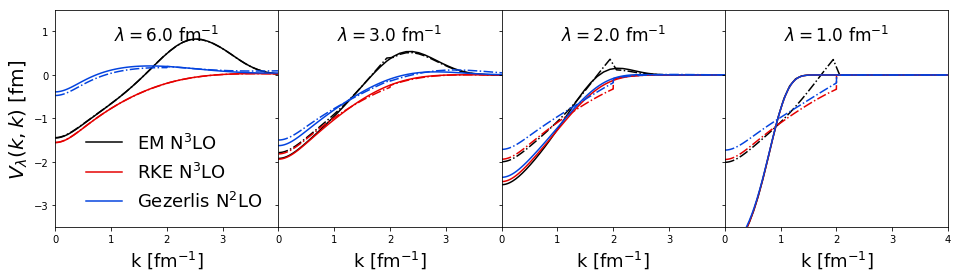

In [6]:
# Plot diagonal and off-diagonal matrix elements of SRG-evolved potentials


# Diagonal matrix elements for the three default SRG-evolved potentials with Wegner and block-diagonal generators
potential_slices('diag', channel, lambda_array, em_n3lo_wegner, em_n3lo_bd2, rke_n3lo_wegner, rke_n3lo_bd2,
                    gez_n2lo_wegner, gez_n2lo_bd2)

# Far off-diagonal matrix elements for the three default SRG-evolved potentials with Wegner and block-diagonal
# generators
potential_slices('off-diag', channel, lambda_array, em_n3lo_wegner, em_n3lo_bd2, rke_n3lo_wegner, rke_n3lo_bd2,
                    gez_n2lo_wegner, gez_n2lo_bd2)